In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [105]:
df=pd.read_csv('/Users/Sonu/Desktop/database.csv',parse_dates=['Date','Time'],encoding='utf-8')

In [106]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02,2017-05-24 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,2017-05-24 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,2017-05-24 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,2017-05-24 18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,2017-05-24 13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [107]:
df.dtypes

Date                          datetime64[ns]
Time                          datetime64[ns]
Latitude                             float64
Longitude                            float64
Type                                  object
Depth                                float64
Depth Error                          float64
Depth Seismic Stations               float64
Magnitude                            float64
Magnitude Type                        object
Magnitude Error                      float64
Magnitude Seismic Stations           float64
Azimuthal Gap                        float64
Horizontal Distance                  float64
Horizontal Error                     float64
Root Mean Square                     float64
ID                                    object
Source                                object
Location Source                       object
Magnitude Source                      object
Status                                object
dtype: object

                                              Checking Nulls

In [108]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [109]:
df.shape

(23412, 21)

In [110]:
df.drop(['Depth Error','Depth Seismic Stations','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square'],axis=1,inplace=True)

In [111]:
print(df.columns)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source',
       'Status'],
      dtype='object')


                                           New Features

In [112]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [113]:
df['hour']=df['Time'].dt.hour
df['minute']=df['Time'].dt.minute
df['second']=df['Time'].dt.second

                                          Treating Nulls

In [114]:
df['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

In [115]:
df[pd.isnull(df['Magnitude Type'])]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,year,month,day,hour,minute,second
6703,1983-08-24,2017-05-24 13:36:00,40.3732,-124.9227,Earthquake,11.93,5.70,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,1983,8,24,13,36,0
7294,1984-11-23,2017-05-24 18:08:00,37.4600,-118.5900,Earthquake,9.00,5.82,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,1984,11,23,18,8,0
7919,1986-03-31,2017-05-24 11:55:00,37.4788,-121.6858,Earthquake,9.17,5.60,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,1986,3,31,11,55,0


In [116]:
df['Magnitude Type'].fillna("MW",inplace=True)

                                      More Statistics About Data

In [117]:
df.describe()

,Latitude,Longitude,Depth,Magnitude,year,month,day,hour,minute,second
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,5.882531,1992.632411,6.537887,15.681488,11.447805,29.288057,29.560311
std,30.113183,125.511959,122.651898,0.423066,14.426100,3.454541,8.670775,6.891314,17.405929,17.411852
min,-77.080000,-179.997000,-1.100000,5.500000,1965.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-18.653000,-76.349750,14.522500,5.600000,1981.000000,4.000000,8.000000,5.000000,14.000000,14.000000
50%,-3.568500,103.982000,33.000000,5.700000,1993.000000,7.000000,16.000000,11.000000,29.000000,30.000000
75%,26.190750,145.026250,54.000000,6.000000,2005.000000,10.000000,23.000000,17.000000,44.000000,45.000000
max,86.005000,179.998000,700.000000,9.100000,2016.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [118]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'Magnitude Type', 'ID', 'Source', 'Location Source', 'Magnitude Source',
       'Status', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

                                               Hypotheis  

1) As long as this data set is concerned the most closely correlated feature I am assuming is latitude and longitude.<br> 2) I assume that these two features should be the golden features. <br>
3) Source Location will matter alot,I guess. <br>
4) Minutes and Seconds Should not matter that much.<br>
5) Hour of the day can be important or might not be important. The tectonic plates movement can be a function of hour? Maybe. We will investigate this <br>
6) Depth of Source will matter. <br>
7) Month ? Not sure. <br>
8) Year ? Again not sure. <br>
9) Id should not matter. Will drop later. <br>

                                             Plots For Trends   

<b>Longitude and Latitude Trend </b>

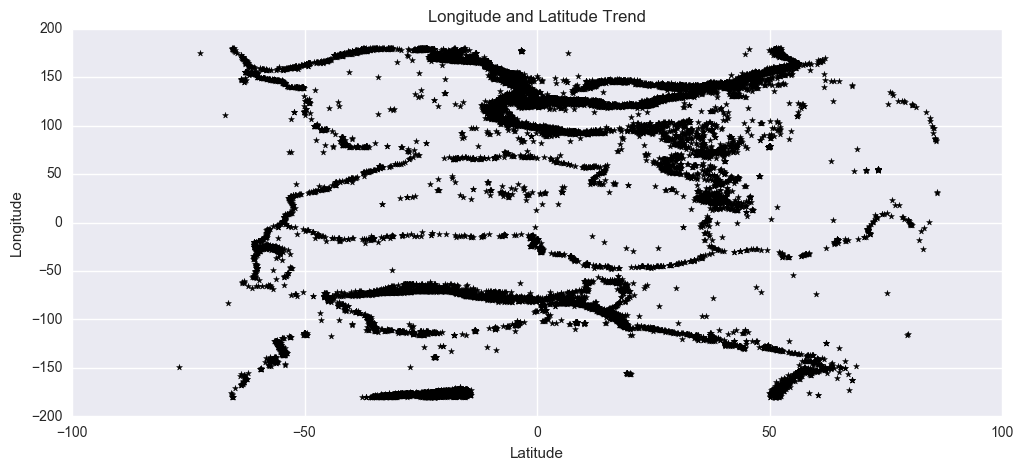

In [119]:
plt.figure(figsize=(12,5))
plt.scatter(x=df['Latitude'],y=df['Longitude'],marker='*',color='black')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Longitude and Latitude Trend',loc='center')
plt.show()

<b>1) Possible Trend: </b>We can clearly see a dark patch between longitude <b>100 to 150</b> and Latitude <b>-25 to 50</b>, Also Earthquakes rarely occurs in too low latitude and too high altitudes 

<b>Latitude Density </b>

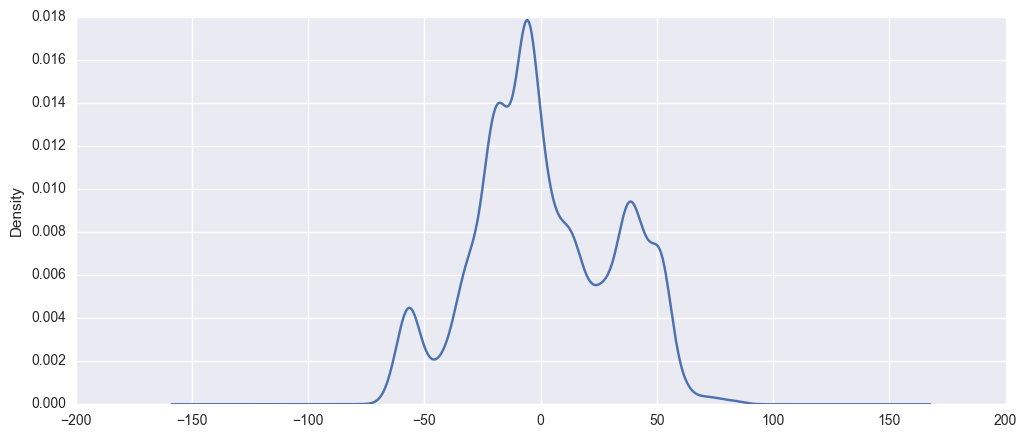

In [120]:
plt.figure(figsize=(12,5))
df['Latitude'].plot(kind='kde')
plt.show()

<b> Latitude and magnitude </b>

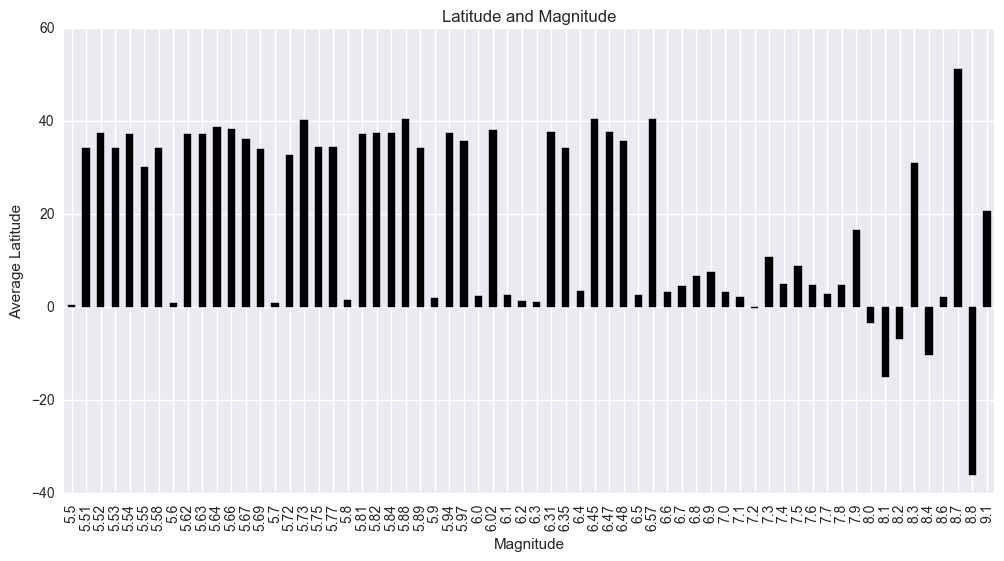

In [121]:
plt.figure(figsize=(12,6))
df.groupby('Magnitude').Latitude.mean().plot(kind='bar',color='black')
plt.title('Latitude and Magnitude')
plt.ylabel('Average Latitude')
plt.show()

<b> 2) Possible Trend: </b> As we approach to high magnitude of earthquake i.e of range 8 to >9, 
The Average altitude responsible is -30 and +50 

<b> Magnitude with Longitude </b>

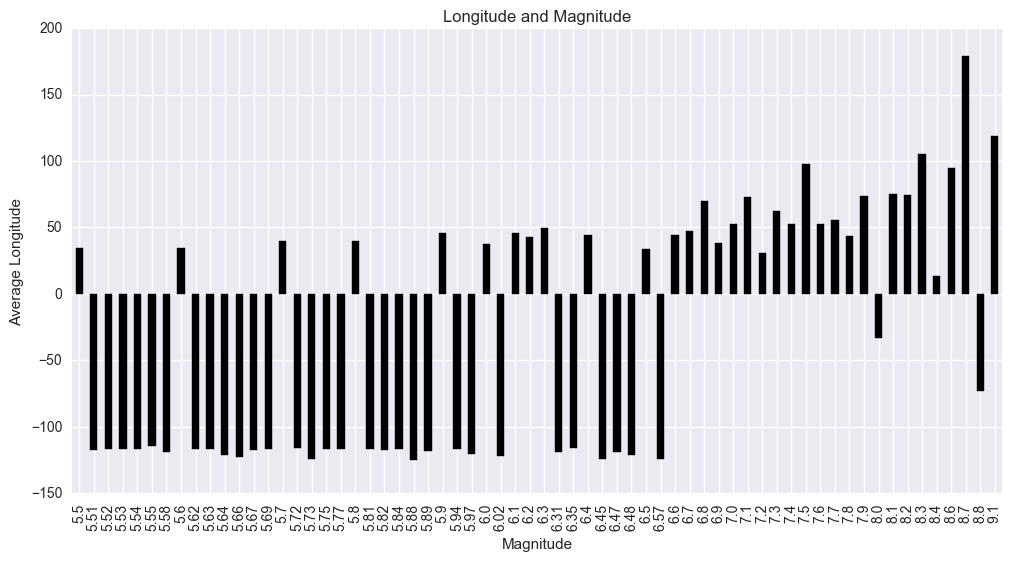

In [122]:
plt.figure(figsize=(12,6))
df.groupby('Magnitude').Longitude.mean().plot(kind='bar',color='black')
plt.title('Longitude and Magnitude')
plt.ylabel('Average Longitude')
plt.show()

<b> 3) Possible Trend: </b> The high magnitude Earthquakes(>6.5) occurs only in are with positive average longitude
    and as the average starts increasing the magnitude increases(not certainly a perfect trend) 

<b> Magnitude with Depth </b>

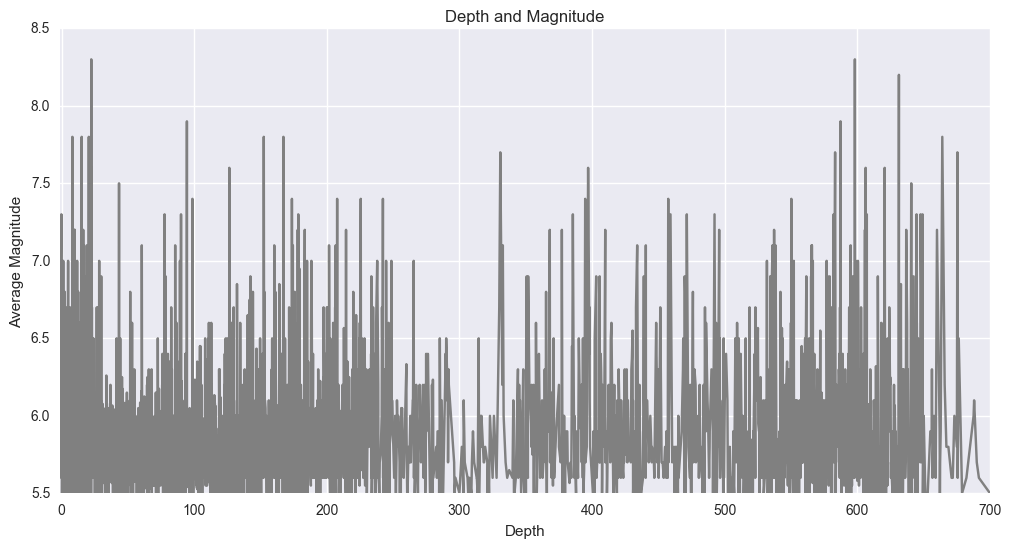

In [123]:
plt.figure(figsize=(12,6))
df.groupby('Depth').Magnitude.mean().plot(kind='line',color='grey')
plt.title('Depth and Magnitude')
plt.ylabel('Average Magnitude')
plt.show()

<b>Year ? </b>

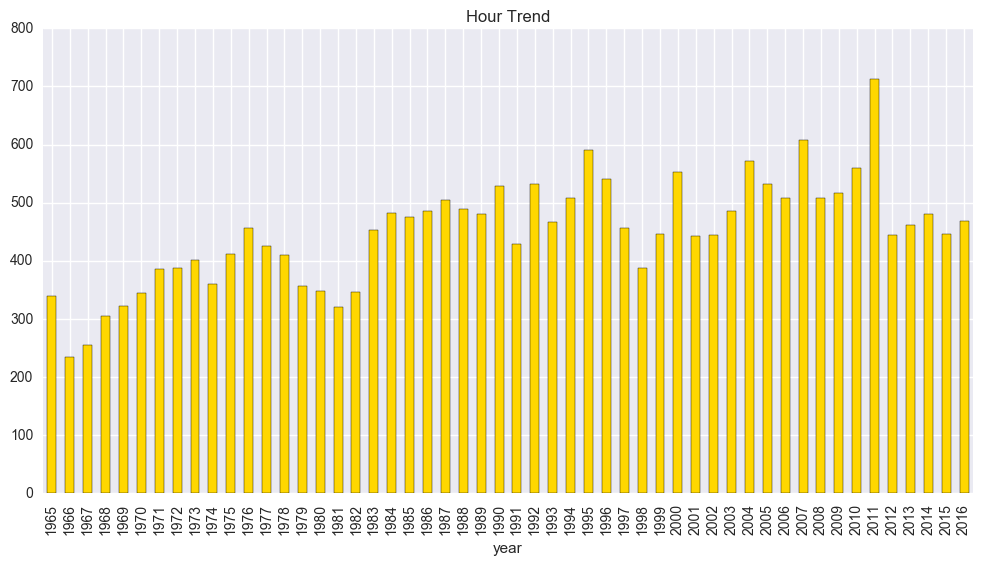

In [124]:
plt.figure(figsize=(12,6))
df.groupby('year').year.count().plot(kind="bar",color="gold")
plt.title("Hour Trend")

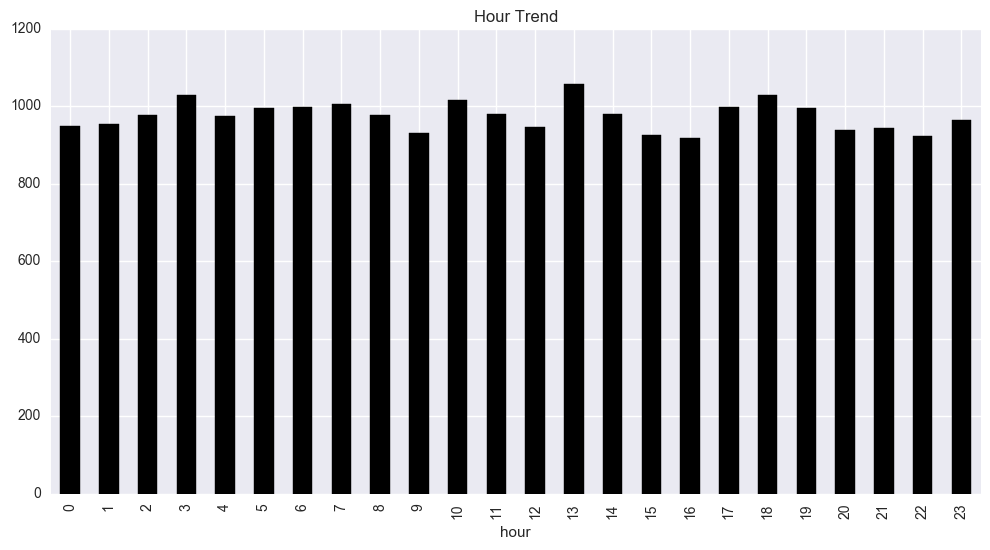

In [125]:
plt.figure(figsize=(12,6))
df.groupby('hour').hour.count().plot(kind="bar",color="black")
plt.title("Hour Trend")

Like assumed, the hour has no role in EarthQuake Occurance

<b>Source</b>

                                               Plotting in real Map

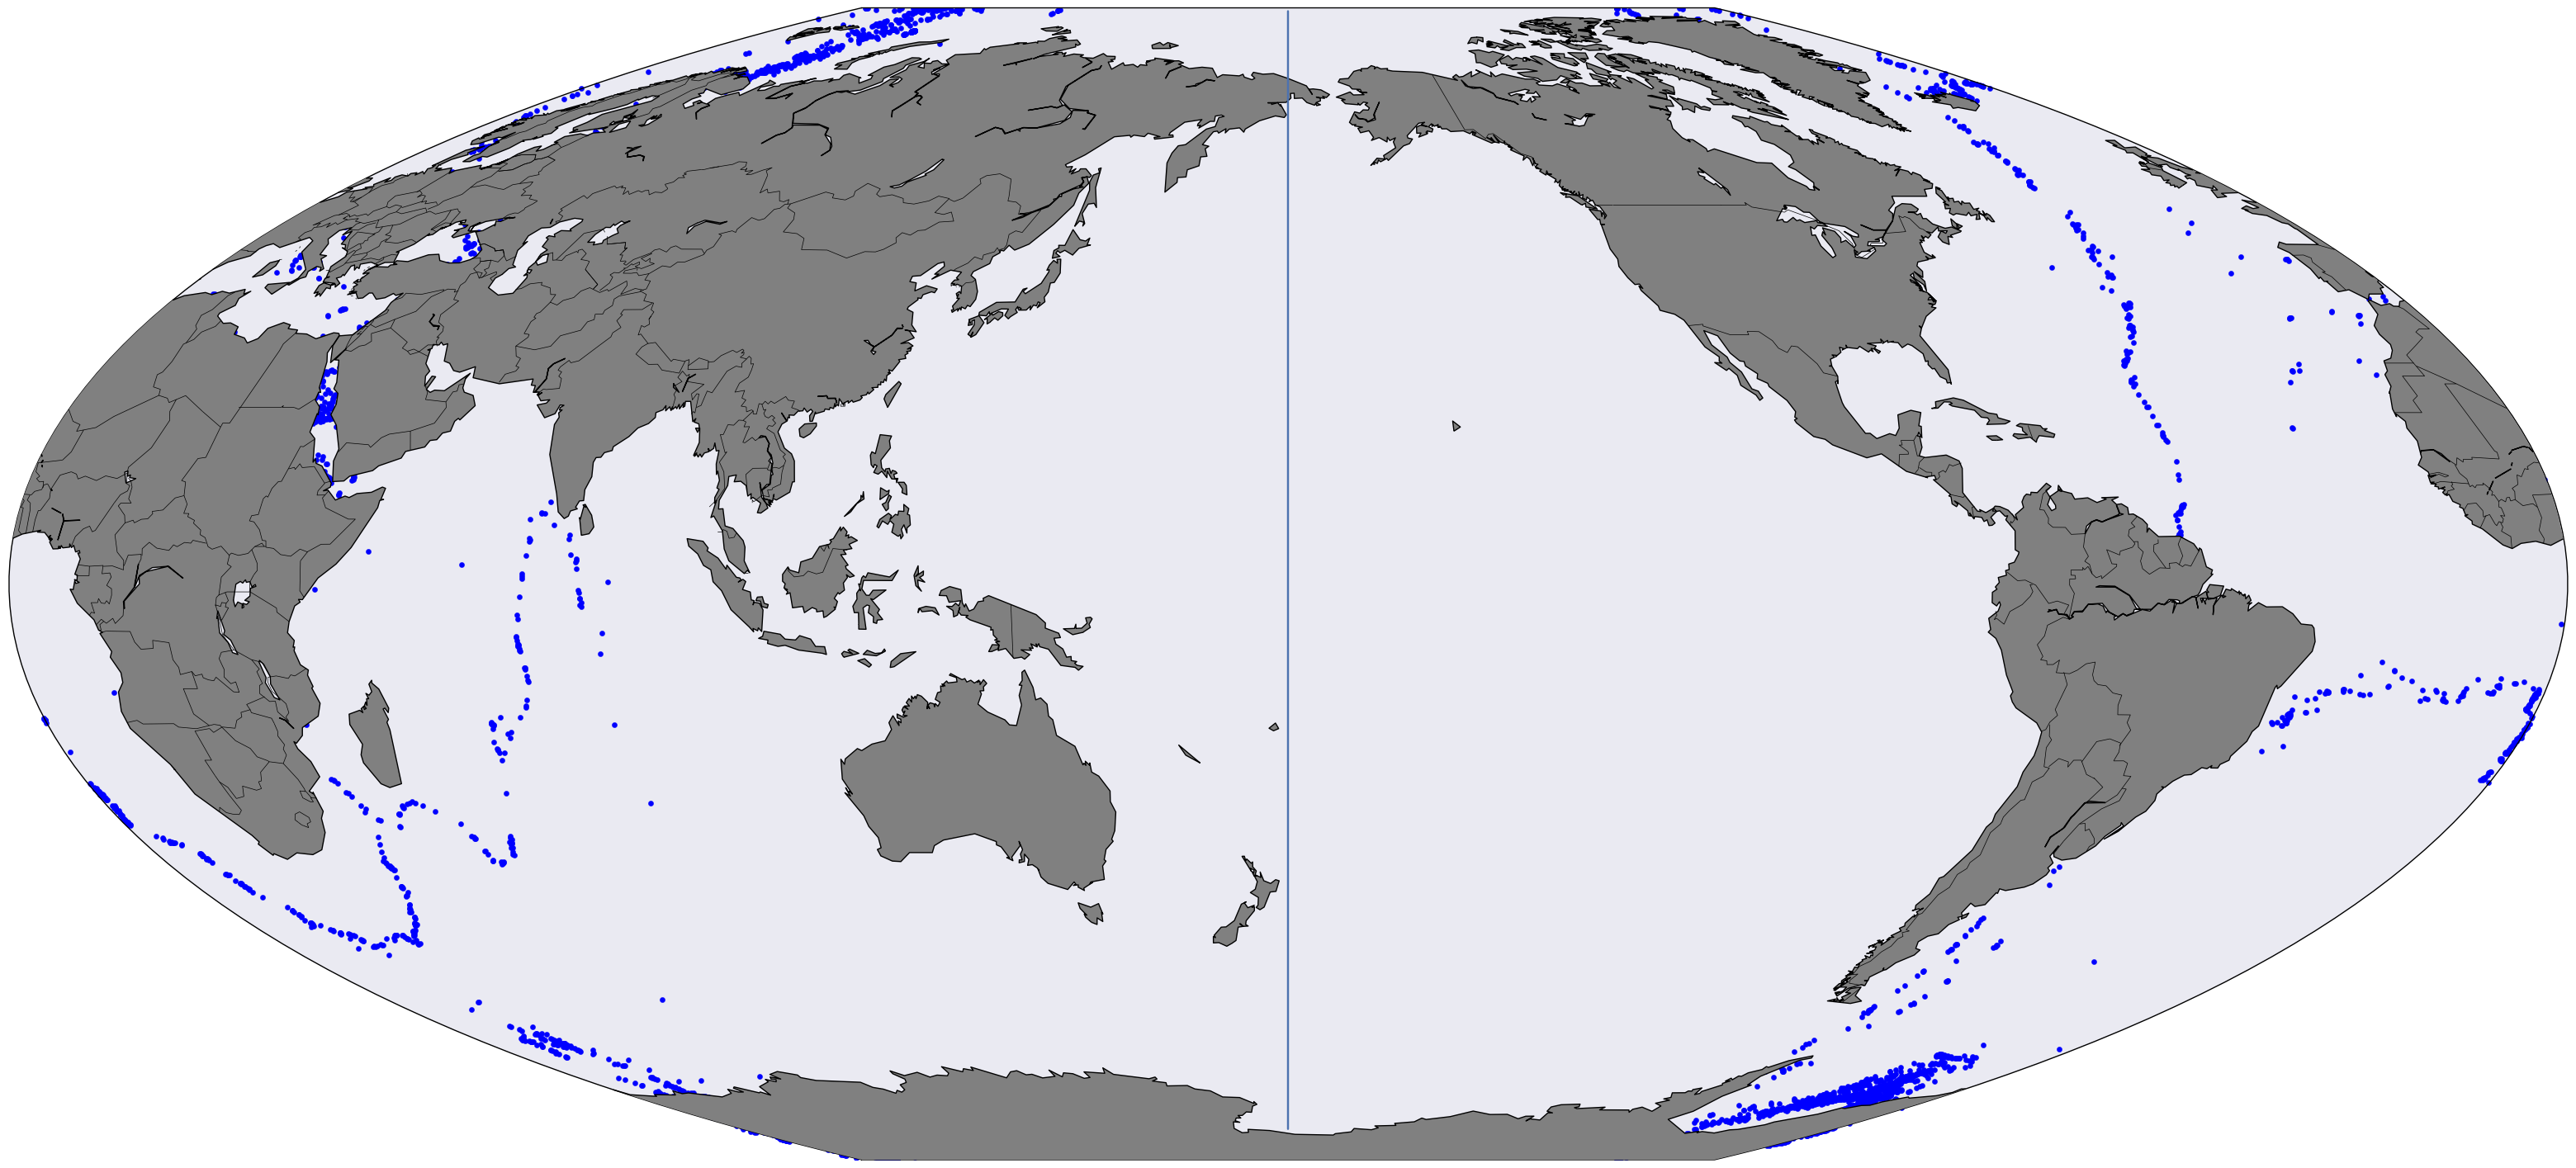

In [139]:
plt.figure(figsize=(40,40))
map=Basemap(projection='mbtfpq',lon_0=np.min(df.Longitude))
x,y=map([latitude for latitude in df["Latitude"]],[longitude for longitude in df["Longitude"]])
map.scatter(x,y,color="b")
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color="grey")
map.drawgreatcircle(lon1=np.min(df.Longitude),lon2=np.max(df.Longitude),lat1=np.min(df.Latitude),lat2=np.max(df.Latitude))
plt.show()

<b> Either the Earthquake happens in oceans or in costal areas </b>

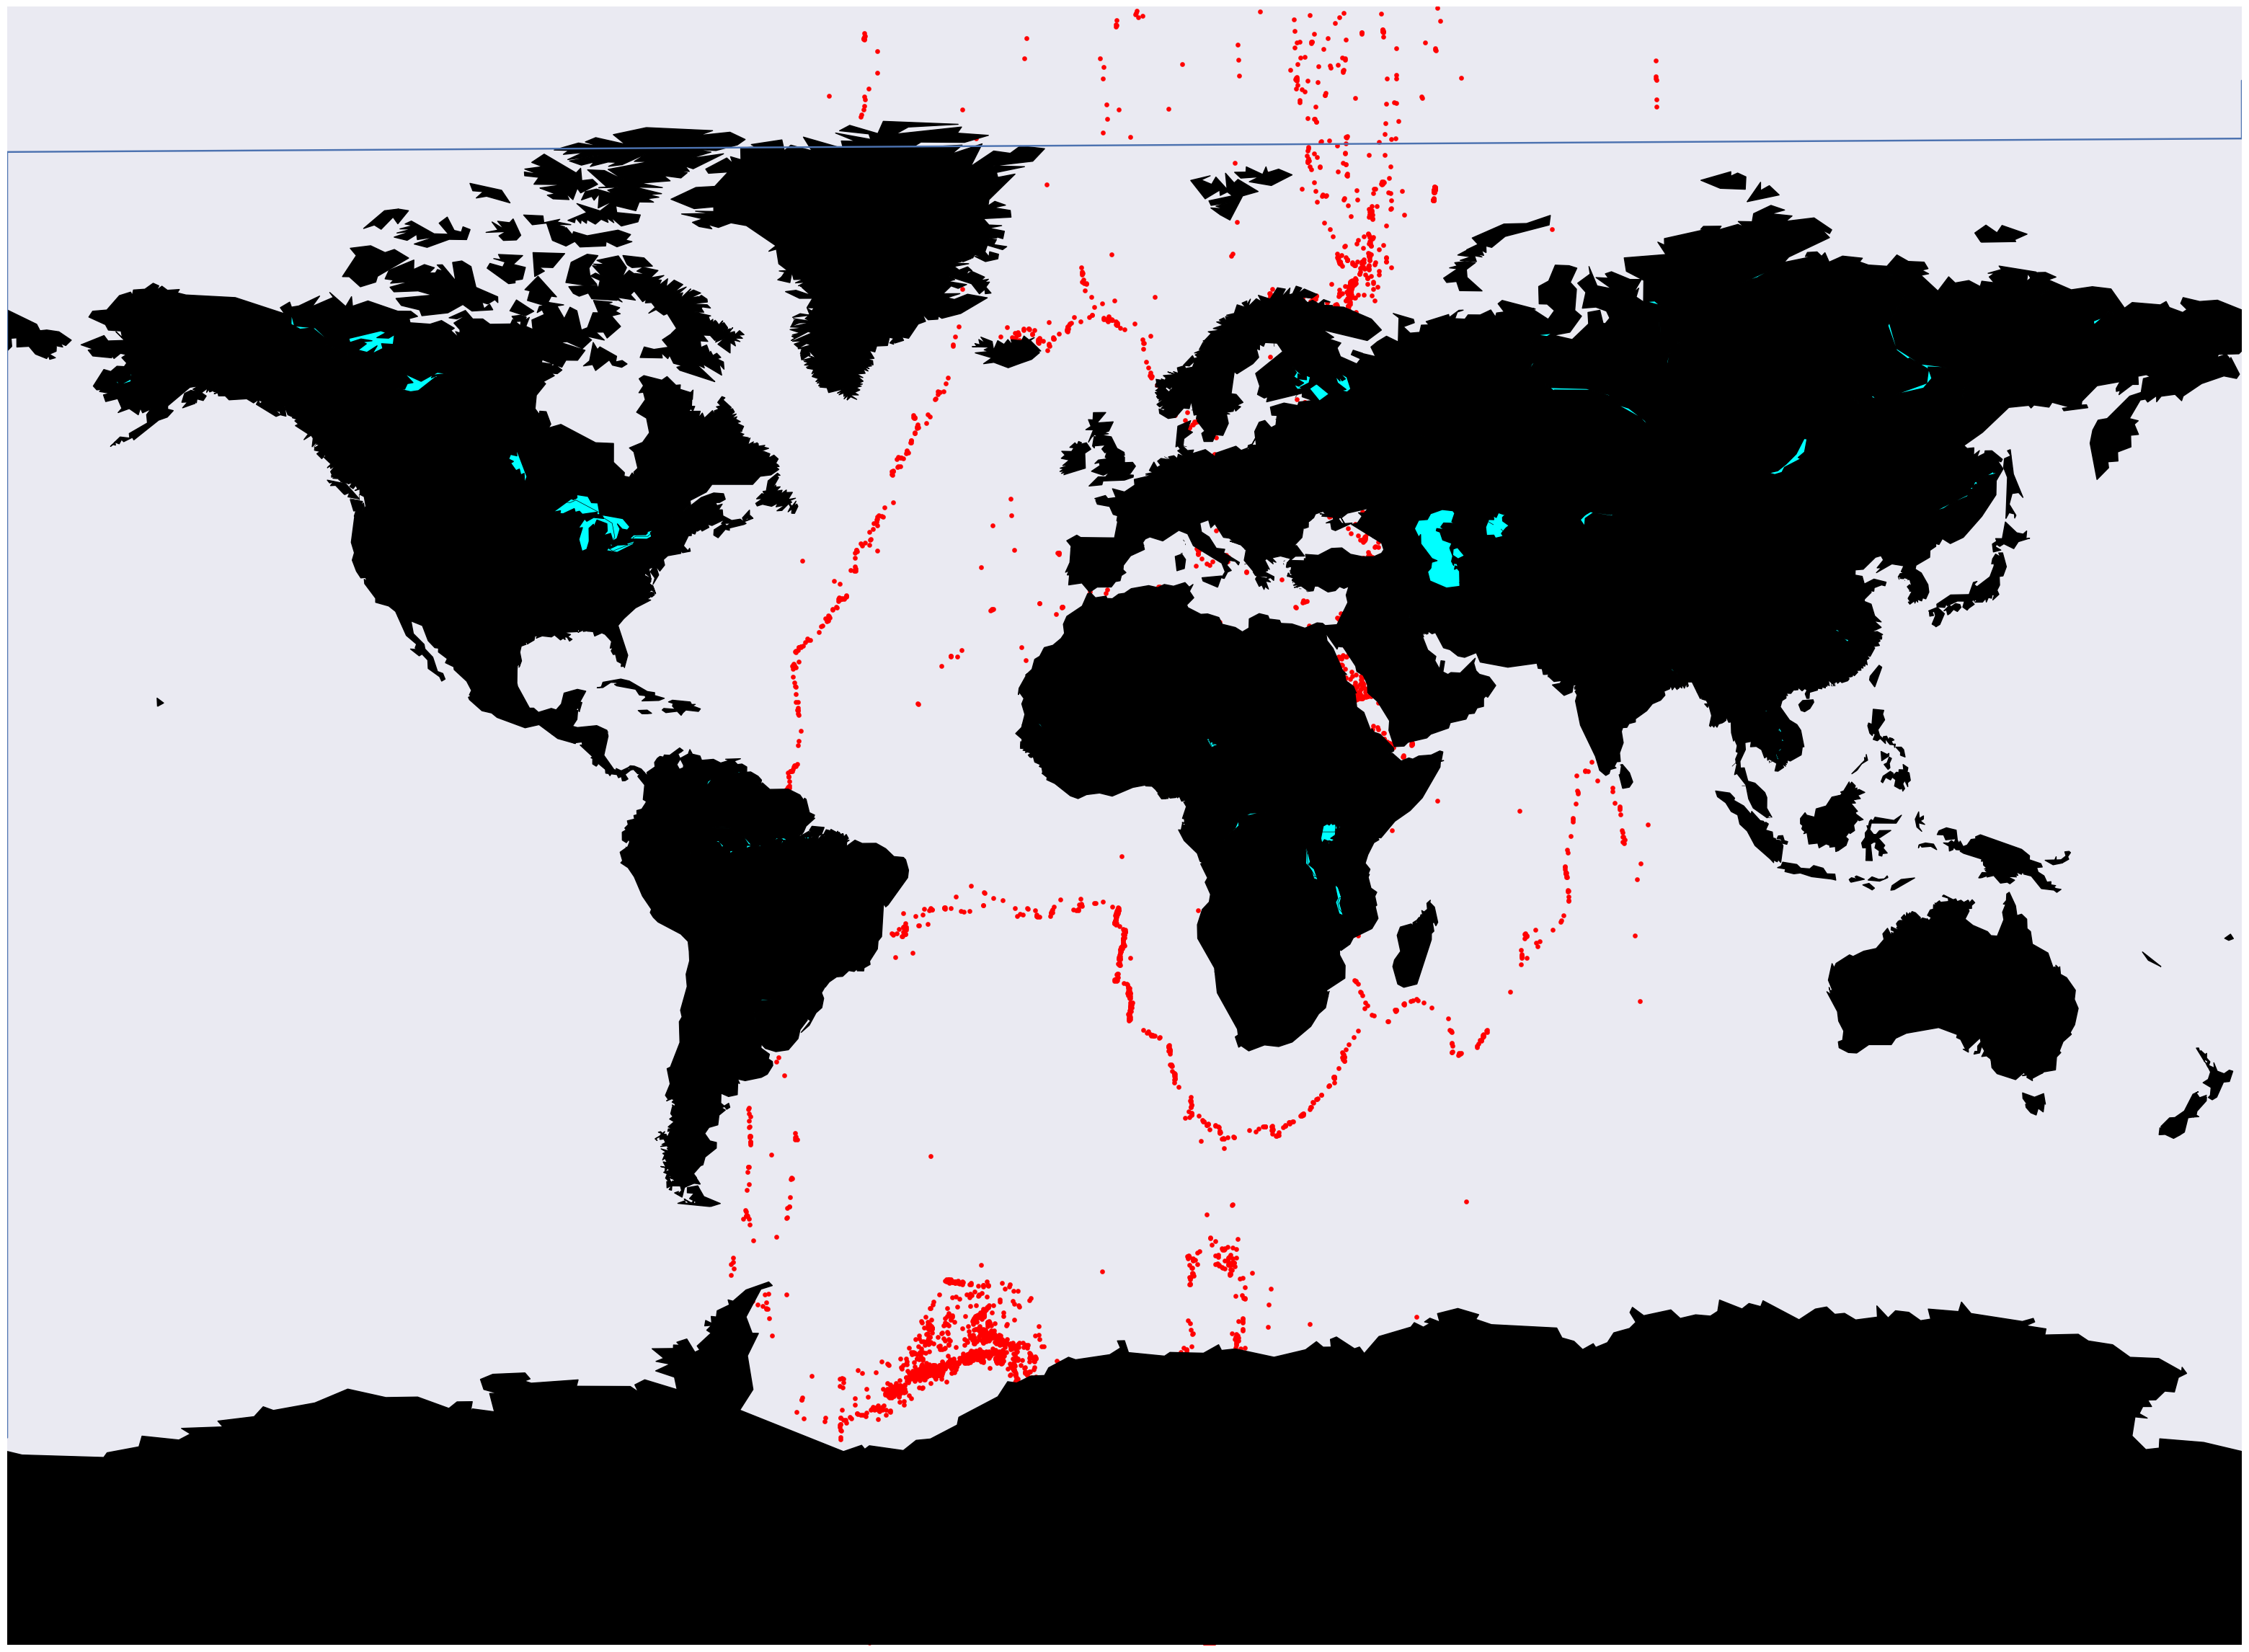

In [156]:
plt.figure(figsize=(40,40))
map=Basemap(projection='mill')
x,y=map([latitude for latitude in df["Latitude"]],[longitude for longitude in df["Longitude"]])
map.scatter(x,y,color="red")
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='black',lake_color='aqua')
map.drawgreatcircle(lon1=np.min(df.Longitude),lon2=np.max(df.Longitude),lat1=np.min(df.Latitude),lat2=np.max(df.Latitude))
plt.show()